In [28]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import category_encoders as ce

import warnings 

from sklearn.linear_model import LinearRegression # For missing value imputation 
from sklearn.experimental import enable_iterative_imputer # For missing value imputation 
from sklearn.impute import IterativeImputer # For missing value imputation 
from sklearn.ensemble import RandomForestRegressor # For missing value imputation
from sklearn.preprocessing import PolynomialFeatures # Add features to dataset
from sklearn.preprocessing import StandardScaler # Used to normalize features
from sklearn.preprocessing import RobustScaler # Used to normalize features
from sklearn.preprocessing import MinMaxScaler # Used to normalize features

warnings.filterwarnings(action="ignore")

# Load loan data
# The loan data has three tables.  The tables are joined by primary keys.
loan_demographics = pd.read_csv("traindemographics.csv")
loan_prev = pd.read_csv("trainprevloans.csv")
loan_perf = pd.read_csv("trainperf.csv")

# Load logistics data
sendy_data = pd.read_csv("sendy_logistics.csv")

In [2]:
# Take a peek at the loan dataset
# loan demographics table
loan_demographics.sample(3).T # Random sample of three rows, then transpose cols for indexes

,1687,2547,3182
customerid,8a858f275c451af5015c588578f40668,8a858e965b5e1b91015b608e62345989,8a858f0d5a859ac0015a85b7eed311de
birthdate,1992-05-30 00:00:00.000000,1979-06-05 00:00:00.000000,1983-11-10 00:00:00.000000
bank_account_type,Savings,Savings,Savings
longitude_gps,7.49732,3.23294,7.01063
latitude_gps,6.42361,6.5313,4.79119
bank_name_clients,UBA,Standard Chartered,Access Bank
bank_branch_clients,NaN,NaN,NaN
employment_status_clients,NaN,Permanent,Permanent
level_of_education_clients,NaN,NaN,NaN


In [3]:
# loan preferences table 
loan_perf.sample(3).T

,3044,2953,49
customerid,8a858fa5552add5d01552f0382527a7e,8a8588235375c27f015376d27f982c9e,8a858f995a4762a5015a4c25b0ea01c3
systemloanid,302002186,301998981,301981230
loannumber,12,4,6
approveddate,2017-07-29 13:26:18.000000,2017-07-27 15:42:02.000000,2017-07-17 07:53:36.000000
creationdate,2017-07-29 12:26:10.000000,2017-07-27 14:40:52.000000,2017-07-17 06:53:30.000000
loanamount,40000,20000,20000
totaldue,44000,24500,24500
termdays,30,30,30
referredby,NaN,NaN,NaN
good_bad_flag,Bad,Bad,Good


In [4]:
# loan previous table 
loan_prev.sample(3).T

,16931,15830,16853
Unnamed: 0,16931,15830,16853
customerid,8a858fd458639fcc015868eb14b542ad,8a858fa3551e78cb015529b4a6b34007,8a858e875c63d395015c723492986f7a
systemloanid,301866256,301737929,301943598
loannumber,5,3,1
approveddate,2017-04-12 18:54:51.000000,2016-10-06 09:39:13.000000,2017-06-19 13:03:04.000000
creationdate,2017-04-12 17:54:39.000000,2016-10-06 08:38:55.000000,2017-06-19 12:02:56.000000
loanamount,20000,15000,10000
totaldue,23800,18375,13000
termdays,30,30,30
closeddate,2017-05-10 09:13:03.000000,2016-10-27 17:59:03.000000,2017-07-07 18:00:11.000000


In [5]:
# sendy logistics table
sendy_data.sample(3).T

,10697,7861,19444
Order No,Order_No_9288,Order_No_22698,Order_No_11193
User Id,User_Id_1316,User_Id_2309,User_Id_253
Vehicle Type,Bike,Bike,Bike
Platform Type,3,2,1
Personal or Business,Business,Personal,Personal
Placement - Day of Month,11,12,29
Placement - Weekday (Mo = 1),1,5,2
Placement - Time,3:52:35 PM,3:55:25 PM,7:11:01 AM
Confirmation - Day of Month,11,12,29
Confirmation - Weekday (Mo = 1),1,5,2


### Handling missing values using Mean, Mode, and Median

The choice of handling missing values is dependent on the type of features.  For categorical features, you can do things like: 
- Mode filling: Fill missing values with the most popular/frequent/modal class.
- Temporal filling (forward or backward fill): Fill missing values with the preceeding value (top-down) or  with succeeding value (bottom-up).
- Encoding and fill: In this method you can encode the values using different strategies and then fill with either the mean, mode, or median.

In the loan demographic data set, there are three categorical features (bank_branch_clients, employment_status_clients, level_of_education_clients).  Walk through the process of mode filling the missing values using the employement_status_clients variable.  This process holds largely true for Mean and Meadian.

In [6]:
# Fill the categorical column employment_status_clients
print(f"Shape of loan_demographic table is: {loan_demographics.shape[0]} rows and {loan_demographics.shape[1]} columns")

# Get a sum of null values for each variable 
loan_demographics_nas = pd.DataFrame(loan_demographics.isna().sum(), columns=["total_nulls"])

loan_demographics_nas

Shape of loan_demographic table is: 4346 rows and 9 columns


,total_nulls
customerid,0
birthdate,0
bank_account_type,0
longitude_gps,0
latitude_gps,0
bank_name_clients,0
bank_branch_clients,4295
employment_status_clients,648
level_of_education_clients,3759


In [7]:
# Return a value count for the discreet classes in the employement_status_clients variable 
employment_status_clients_classes = loan_demographics["employment_status_clients"].value_counts().to_frame(name="value_counts")

employment_status_clients_classes

,value_counts
Permanent,3146
Self-Employed,348
Student,142
Unemployed,57
Retired,4
Contract,1


From the value_counts you can see the classes present and their corresponding frequencies.  The Permanent class has the highest frequency and will be used to fill missing values in the employment_status_clients variable.

In [8]:
# Mode fill employment_status_clients with "Permanent"
loan_demographics["employment_status_clients"] = loan_demographics["employment_status_clients"].fillna(value="Permanent")

# Get a sum of null values for each variable 
loan_demographics_nas = pd.DataFrame(loan_demographics.isna().sum(), columns=["total_nulls"])

loan_demographics_nas

,total_nulls
customerid,0
birthdate,0
bank_account_type,0
longitude_gps,0
latitude_gps,0
bank_name_clients,0
bank_branch_clients,4295
employment_status_clients,0
level_of_education_clients,3759


For continuous variables, you can do things like: 
- Filling with mean, mode, or median
- Temporal filling (backward or forward)
- Use machine learning models: Train a machine learning model to learn the most appropriate fill values

Prior to filling in a continuous variable, select some variables that correlate with the variable you are working with (in this case Precipitation in millimeters from the sendy_data table).  That is which feature(s) can help predict Percipitation in millimeters.  A Seaborn heatmap can help here.

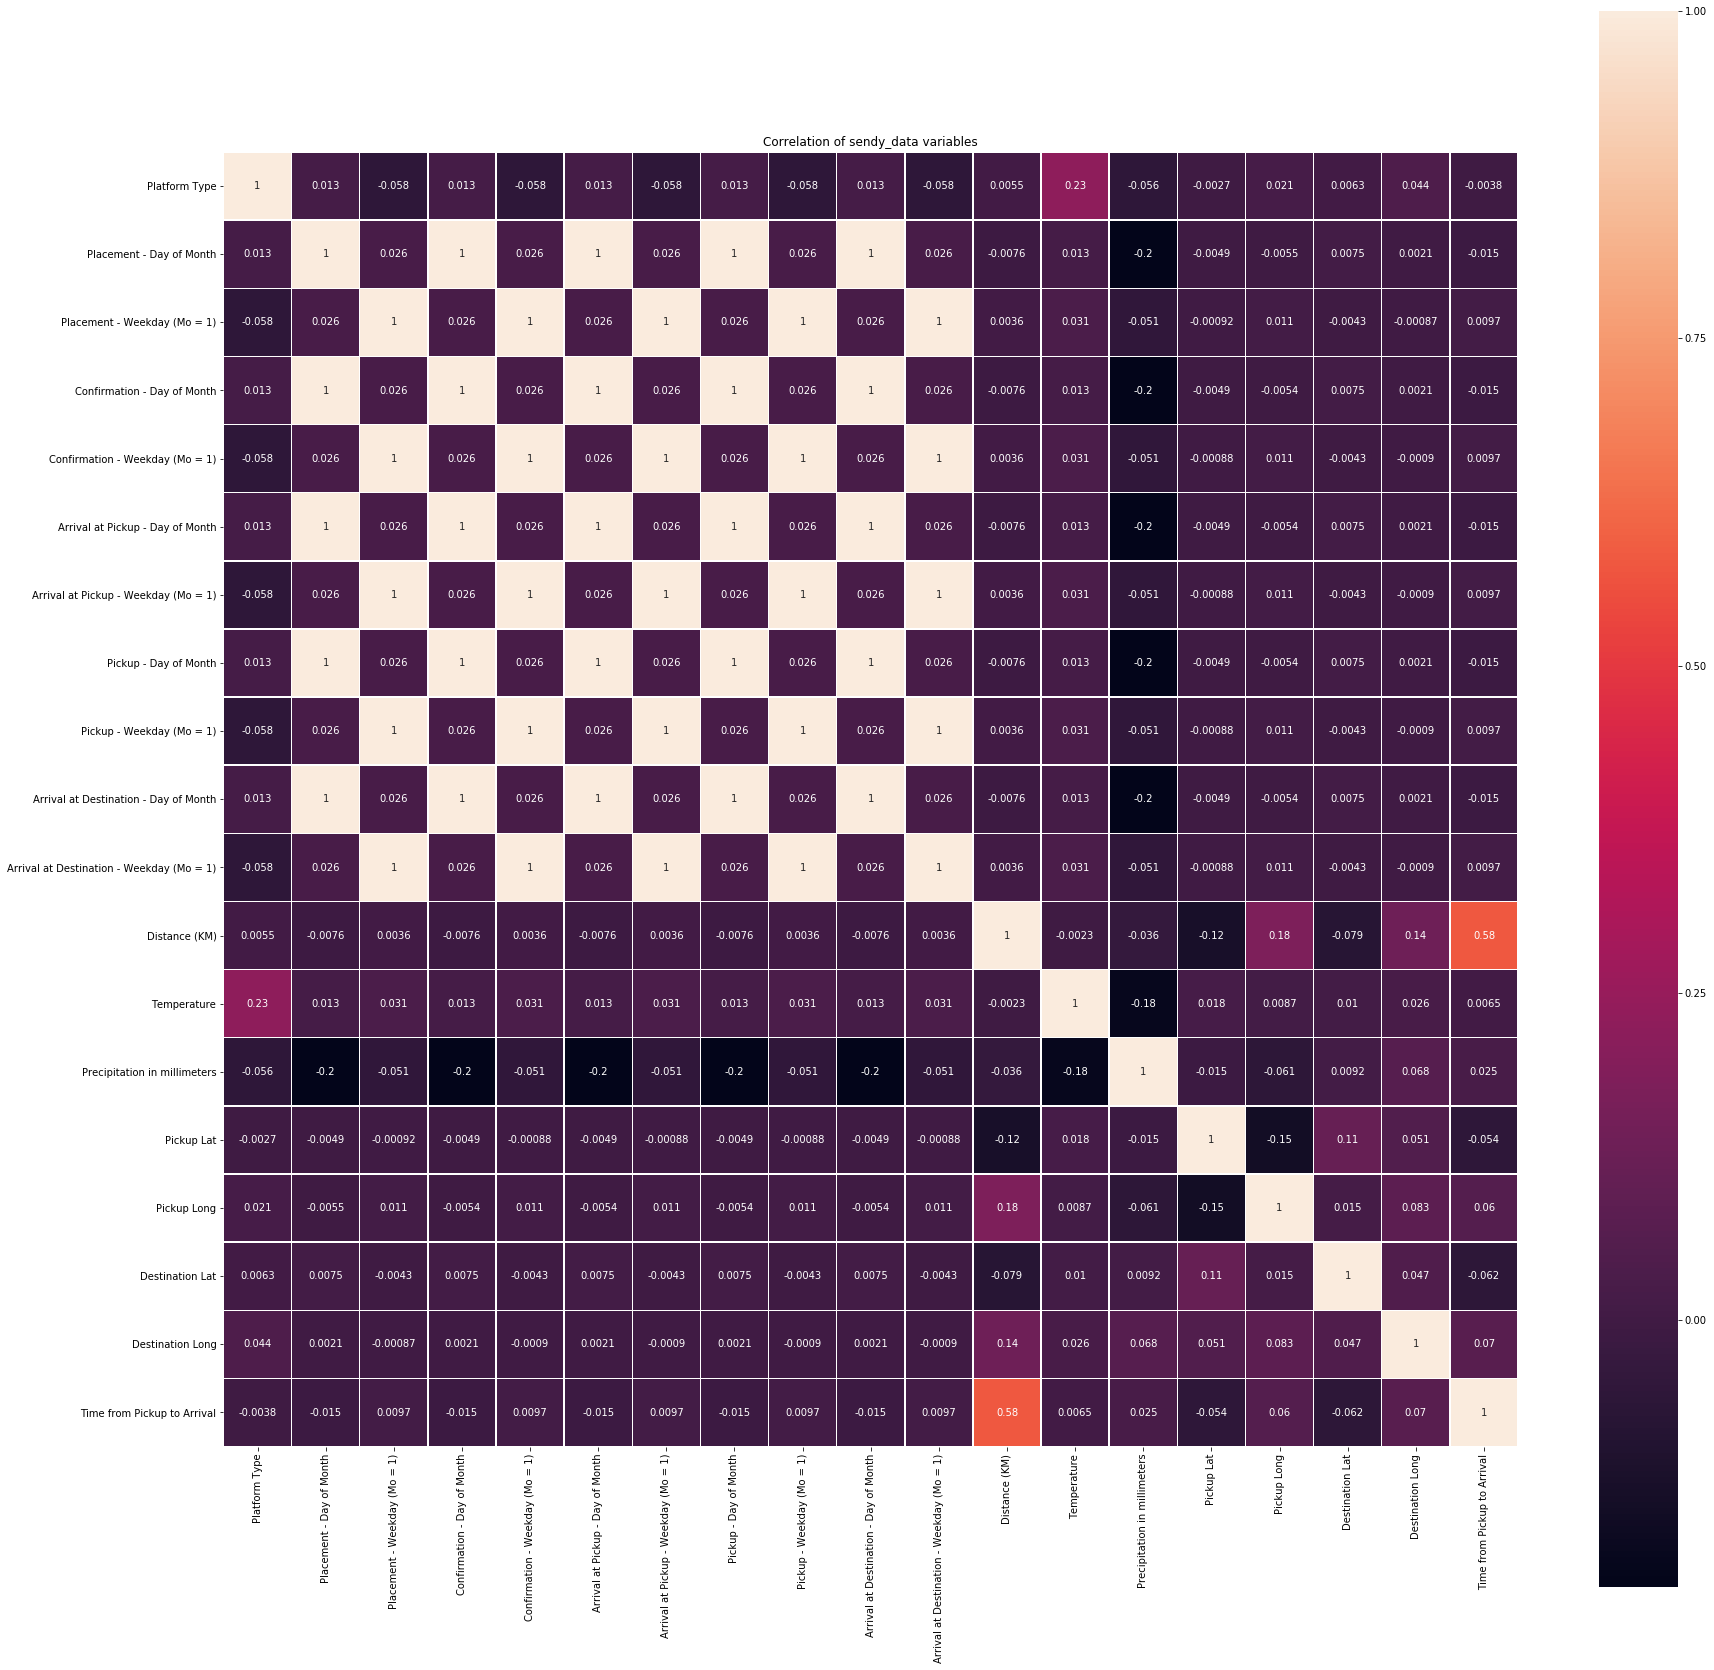

In [9]:
# Get correlated values
plt_sz = len(sendy_data.columns)

plt.figure(figsize=(plt_sz,plt_sz))
sns.heatmap(sendy_data.select_dtypes(exclude=["object","datetime"]).corr(), square=True, annot=True, linewidth=0.5)
plt.title("Correlation of sendy_data variables")

# Fix display issues for this version of matplotlib
b,t = plt.ylim()
b += 0.5
t -= 0.5
plt.ylim(b,t)
# plt.yticks(rotation=360)

plt.show();

From the heatmap above, you can see that the majority of the features to not really correlate with the Percipitation in millimeters variable.  You can make use of the last three features (Destination Lat, Destination Long, and Time from Pickup to Arrival) as these show little correlation.  Train a Linear Regression model to perform the fill.

In [10]:
# Select a linear regression model to train
lr = LinearRegression()

# Variables to train with
to_train = ["Precipitation in millimeters", "Destination Lat", "Destination Long", "Time from Pickup to Arrival"]

# Training dataframe
temp_df = sendy_data[to_train]

# Split the dataset that contains the missing values and no missing value as test and train respectively
x_train = temp_df[temp_df["Precipitation in millimeters"].notnull()].drop(columns=["Precipitation in millimeters"]) # Get the non-null rows of X
y_train = temp_df[temp_df["Precipitation in millimeters"].notnull()]["Precipitation in millimeters"] # Get the non-null y
x_test = temp_df[temp_df["Precipitation in millimeters"].isnull()].drop(columns=["Precipitation in millimeters"]) # Get the null rows of X

lr.fit(x_train, y_train)
pred = lr.predict(x_test)

print(np.round(pred, 5))

sendy_data["Precipitation in millimeters"][sendy_data["Precipitation in millimeters"].isnull()] = pred

[8.03056 8.18609 7.86142 ... 8.46164 7.45028 8.60717]


First, you instantiated a linear Regression model then saved the <u>most</u> correlated values to Precipitation in millimeters as observed from the heatmap plot to a list called to_train.  Then you created a train and test data set from these variables where the train dataset contains no missing values and the test dataset contains the missing values you want to predict.  Finally, you fit the model, make predictions on the test set and use the predictions to fill the missing values.  

Alternatively, you can use the **iterativeimputer** function in the `sklearn.experimental` model to auto matically fill missing values using machine learing models, that is demonstrated next.

In [11]:
# Get the indexes of missing data so the fill values can be reviewed
missing_idx_temperature = list(sendy_data["Temperature"][sendy_data["Temperature"].isna()].index)

# Run imputer with a Random Forest estimator
imp = IterativeImputer(RandomForestRegressor(n_estimators=5), max_iter=5, random_state=1)

# variables to train on - X
to_train = ['Temperature', 'Destination Lat', 'Destination Long', 'Time from Pickup to Arrival']
sendy_data[to_train] = pd.DataFrame(imp.fit_transform(sendy_data[to_train]), columns=to_train)

In [12]:
# Look a a sample of the filled vlues from the missing_idx_temperature list
sendy_data["Temperature"][missing_idx_temperature].sample(10)

11016    25.88
2745     23.20
18557    22.80
17926    20.40
2524     20.74
15814    23.10
20017    26.46
3340     20.76
8079     22.04
2445     23.38
Name: Temperature, dtype: float64

### How to Handle Categorical Features

Categorical features are features which can take on values from a limited set of values.  For example the relative hotness of a place/thing (hot, hotter, hottest) or star ratings for an app (1,2,3,4,5).  In regard to the datasets here, features like level_of_educaiton_clients in the loan_demographics dataset is a categorical feature containing classes like (Secondary, Graduate, Post-Graduate, Primary).  

Machine learning model cannot work with categorical features the way they are.  These features must be converted to numerical forms before they can be used.  The process of converting the categorical features to numerical features is called encoding.  There are numerous types of encoding available, and the choice of which to use depends on the categorical type.  Take a look at some options.

- Ordinal Categorical Features: Features have a naturally ordered category, one class is higher than another.  For example star ratings (1,2,3,4,5) where 5 is the highest rating.
- Non-Ordinal Categorical Features: Features have no order, no class is higher than another.

#### Label Encoding 

If the classes in a categorical feature ordinal, and the unique values are small, then you can manually assign labels that have some form of ordering.  That is demonstrated next using the level_of_educaiton_clients feature in the loan_demographics dataset.  The ordinality of the feature from high to low is as follows: Post-Graduate, Graduate, Secondary, and Primary.

In [13]:
# Get the unique values for the level_of_education_clients feature
loan_demographics["level_of_education_clients"].unique()

array([nan, 'Secondary', 'Graduate', 'Post-Graduate', 'Primary'],
      dtype=object)

In [14]:
# Use map() to encode
map_education = {"Primary":1, "Secondary":2, "Graduate":3, "Post-Graduate":4}

loan_demographics["level_of_education_clients"] = loan_demographics["level_of_education_clients"].map(map_education)

# employment_status_clients_classes = loan_demographics["employment_status_clients"].value_counts().to_frame(name="value_counts")
level_of_education_classes = loan_demographics["level_of_education_clients"].value_counts().to_frame(name="value_counts")

level_of_education_classes

,value_counts
3.0,420
2.0,89
4.0,68
1.0,10


To perform automated encoding you can use the `categorical_encoders` library. This library offers numerous encoding schemes out of the box and has first hand support for Pandas DataFrames.

If you have a large number of classes in a categorical feature, you can use label encoding.  Label encoding assigns a unique label (integer) to a specific class.  This is demonstrated using two features (bank_name_clients and bank_branch_clients) with large numbers of unique classes 18 and 45 respectively.

In [15]:
# Check the number of unique classes
cat_cols = loan_demographics.select_dtypes(include="object").columns

for col in cat_cols:
    print(f"Number of classes in {col}: {loan_demographics[col].nunique()}")

Number of classes in customerid: 4334
Number of classes in birthdate: 3297
Number of classes in bank_account_type: 3
Number of classes in bank_name_clients: 18
Number of classes in bank_branch_clients: 45
Number of classes in employment_status_clients: 6


The `OrdinalEncoder()` function in `categorical_encoders` can be used to label encode as shown below.  First, save the categorical columns you want to encode to a list.  Then instantiate the encoder objects for the columns you want to encode.  Finally, fit transform on the dataset.

In [16]:
# Label encoding
cat_cols = ["bank_name_clients", "bank_branch_clients"] 

# Instantiate the encoder 
encoder = ce.OrdinalEncoder(cols=cat_cols)

# Fit transform the dataset
loan_demographics = encoder.fit_transform(loan_demographics)

# Take a look at a sample
loan_demographics.sample(n=3).T

,1912,316,4057
customerid,8a858ec25a4d1d16015a5004af0d4d20,8a858e1e54e2aa5a0154e7e0494068e1,8a858fd1572b90090157371452df3711
birthdate,1992-12-09 00:00:00.000000,1987-05-10 00:00:00.000000,1986-07-10 00:00:00.000000
bank_account_type,Savings,Savings,Savings
longitude_gps,6.77174,3.36162,7.57331
latitude_gps,6.12655,6.53314,9.00459
bank_name_clients,10,2,10
bank_branch_clients,1,1,1
employment_status_clients,Permanent,Self-Employed,Permanent
level_of_education_clients,NaN,NaN,NaN


#### One-Hot Encoding

One-Hot encoding uses binary values to represent classes.  The one-hot encoder creates a feature per category, and quickly becomes inefficient by creating a large number of features as the number of classes in the categorical feature increases. In the example below, you first save the columns to encode to a list.  Then create an encoder object for the transform columns.  Finally, perform a fit transform on the dataset.

In [17]:
# Columns to One-Hot encode
cats = ["bank_account_type","level_of_education_clients"]

# Instantiate the encoder
one_hot_enc = ce.OneHotEncoder(cols=cats)

# Fit transform the dataset
loan_demographics = one_hot_enc.fit_transform(loan_demographics)

# Take a look at a sample
loan_demographics.sample(n=3).T

,3512,273,64
customerid,8a858e245c214660015c301d19ab184f,8a858fc55b2fde30015b300d85e20ef2,8a858fba5cd5feee015cdb7d7d574f0f
birthdate,1989-06-28 00:00:00.000000,1990-12-07 00:00:00.000000,1973-11-23 00:00:00.000000
bank_account_type_1,1,1,1
bank_account_type_2,0,0,0
bank_account_type_3,0,0,0
longitude_gps,3.31265,4.61301,6.55588
latitude_gps,7.10446,8.48143,9.60331
bank_name_clients,3,6,1
bank_branch_clients,1,1,1
employment_status_clients,Permanent,Permanent,Permanent


#### Hash Encoding 

Hash encoding or _feature hashing_ is a fast and space-efficient way of encodeing features.  It is very efficient for categorical features with large numbers of classes.  Hash encoder works by applyin a hash function to the features.  In the example below, first, specify the features to be hash encoded.  Then create a hash encoder object and specify the length of the hash vector to use.  Finally, perform a fit transform on the dataset.

In [18]:
# Columns to Hash transform
cat_cols = ["bank_name_clients", "bank_branch_clients"]

# Instantiate a Hash encoder
hash_enc = ce.HashingEncoder(cols=cat_cols, n_components=10)

# Fit transform the dataset
loan_demographics = hash_enc.fit_transform(loan_demographics)

# Take a look at a sample
loan_demographics.sample(n=3).T

,635,1414,364
customerid,8a858e8d56b784480156bc6edb9004d9,8a858e625c8d993a015c938f829f77ee,8a858fd85507735701550d603b101f21
birthdate,1983-12-14 00:00:00.000000,1988-12-20 00:00:00.000000,1988-04-28 00:00:00.000000
bank_account_type_1,0,1,1
bank_account_type_2,1,0,0
bank_account_type_3,0,0,0
longitude_gps,3.28304,5.76833,7.05909
latitude_gps,6.58146,5.56199,8.96163
bank_name_clients,11,11,4
bank_branch_clients,1,1,1
employment_status_clients,Self-Employed,Permanent,Self-Employed


#### Target Encoding

In target encoding, you replace a categorical value with the mean of the target variable.  That is, you calculate the average of the target value by a specific category.  Target encoding helps to encode useful properties of the feature and can sometimes help improve classification models while sometimes it can lead to severe overfitting.  To demonstrate target encoding you will use the loan performance dataset (loan_perf).  The target of interest in this dataset is the feature (good_bad_flag) and the task is to predict if a customer will repair a loan or not.  The feature good_bad_flag is represented as categorical, so first convert it to numbers.  Next, target encode the feature loannumber.  This feature is continuous, but can be treated like a categorical feature because of its limited number of classes. 

In [19]:
# Create a mapping dict to convert the categorical feature to a numeric value
map_target = {"Good":0, "Bad":1}

# Map the values onto the dataset
loan_perf["good_bad_flag"] = loan_perf["good_bad_flag"].map(map_target)

# instantiate a target encoder for the loannumber feature
target_enc = ce.TargetEncoder(cols=["loannumber"]) 

# Fit transform the dataset 
loan_perf = target_enc.fit_transform(X=loan_perf, y=loan_perf["good_bad_flag"])

# Take a look at a sample
loan_perf.sample(n=3).T

,443,680,792
customerid,8a858e065ccb8bc0015ccbf7b21c1875,8a858e875c63d395015c69cfb3733438,8a858e0b5cfa2028015d099b789b229f
systemloanid,301960177,301964334,302002420
loannumber,0.249103,0.249103,0.249103
approveddate,2017-07-02 18:10:44.000000,2017-07-05 08:22:01.000000,2017-07-29 16:29:59.000000
creationdate,2017-07-02 17:10:38.000000,2017-07-05 07:21:56.000000,2017-07-29 15:29:50.000000
loanamount,10000,10000,10000
totaldue,13000,13000,11500
termdays,30,30,15
referredby,NaN,8a858f265c2187bd015c254c6c395bef,NaN
good_bad_flag,0,0,0


Some other encoders, not covered here are: Binary Encoders, Count Encoders, Leave One Out Encoders, CatBoost Encoder, and more.  The [category_encoders](https://contrib.scikit-learn.org/categorical-encoding/) documentation is a good place to start.  

### How to Handle Numerical/Continuous Features

Numerical/Condinuous features are the mose common type of features found in datasets.  They can cake values from a given range.  For example, the price of a product, the temperature of a place, coordinates of a place on a map.  Feature Engineerin on numerical features mostly depends on domain knowledge.  Log transformations help to center or in statistical terms, normally distribute, data and can help most machine learning models perform better.  

**\*Note: ** _If you log transform the target feature, always take the exponent at the end of the analysis when interpreting the result._

Log transformations are mostly performed on _skewed_ features.  Features can either be left or right skewed.  Skewness can be easily checked by visualization, this will be demonstrated below using the Distance (KM) feature in the sendy dataset:

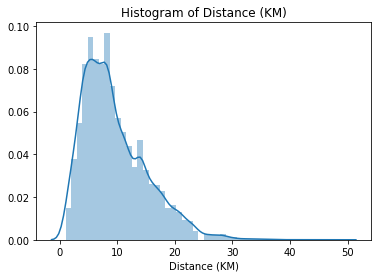

In [20]:
sns.distplot(sendy_data["Distance (KM)"])
plt.title("Histogram of Distance (KM)")
plt.show();

First, log transform the Distance (KM) feature by taking the log of all the values.  This example uses numpy's log implementation which adds $1$ to the value before taking the logarithm, this helps to avoid taking log of zero.

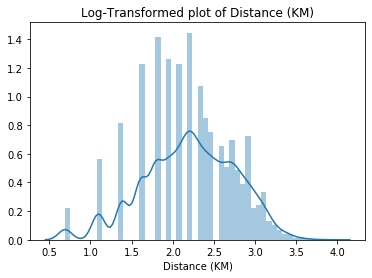

In [21]:
sendy_data["Distance (KM)"] = np.log1p(sendy_data["Distance (KM)"])
sns.distplot(sendy_data["Distance (KM)"])
plt.title("Log-Transformed plot of Distance (KM)")
plt.show();

### Using Domain Knowledge

If you have domain expertise or have someone with domain sxpertise on your team, you can come up with new features that can greatly help your machine learning models.  This will be demonstrated below by creating two features from the loan_prev dataset.  First, a new feature, **interest_elapsed** will be created by calculating the difference between "totaldue" and "loanamount".  Second, **loan_count**, will calculate the total numer of loans collected by a customer by aggregating loan numbers.

In [22]:
# Create feature: interest_elapsed
loan_prev["interest_elapsed"] = loan_prev["totaldue"] - loan_prev["loanamount"] 

# Create feature: loan_count
# First, group by customerid and calculate their total loans taken
loannumber_count = loan_prev.groupby(by="customerid").agg(["count"])[["loannumber"]].reset_index()

# Now, merge the result back into the dataframe
loan_prev = loan_prev.merge(right=loannumber_count, how="left", on="customerid")

# Take a look at what you've done
loan_prev.sample(n=3).T

,10529,9310,6916
Unnamed: 0,10529,9310,6916
customerid,8a858f34588713c201588c59c04b04cd,8a858eac5ad81473015ad82f9d060702,8a858edf594a45ed01597ad745966db1
systemloanid,301763117,301861096,301879462
loannumber,1,1,5
approveddate,2016-11-22 15:50:31.000000,2017-04-09 11:17:13.000000,2017-04-25 05:53:48.000000
creationdate,2016-11-22 14:50:19.000000,2017-04-09 10:16:57.000000,2017-04-25 04:53:36.000000
loanamount,10000,10000,20000
totaldue,13000,11500,21900
termdays,30,15,15
closeddate,2016-12-22 01:31:31.000000,2017-04-25 01:40:23.000000,2017-05-07 22:49:03.000000


Add a new feature to the sendy dataframe called **speed**.  Using knowledge of physics calculate speed as distance per unit of time using the Distance (KM) and Time from Pickup to Arrival features.

In [23]:
# Create a new feature: speed 
sendy_data["speed"] = sendy_data["Distance (KM)"] / sendy_data["Time from Pickup to Arrival"]

# Take a look at the new feature
sendy_data.sample(n=3).T

,3997,20734,19310
Order No,Order_No_24200,Order_No_13059,Order_No_10006
User Id,User_Id_3404,User_Id_3295,User_Id_1075
Vehicle Type,Bike,Bike,Bike
Platform Type,3,3,3
Personal or Business,Business,Business,Business
Placement - Day of Month,5,22,18
Placement - Weekday (Mo = 1),3,3,4
Placement - Time,12:54:55 PM,12:42:11 PM,11:48:11 AM
Confirmation - Day of Month,5,22,18
Confirmation - Weekday (Mo = 1),3,3,4


### Polynomial (Cross) Features

Polynomial features are created from the interaction among features.  It helps to capture relationships among independent features/variables and can help decrease bias of a machine learning model when it is not contributing to massive overfitting.  You can create polynomial/cross features manually by adding, multiplying, or dividing features with each other.  Here, though, polynomial features will be created using `sklearn`'s `PolynomialFeatures` library.  The new feature will create interaction among the loannumber, totaldue, and termdays features.  

First, instanciate a `PolynomialFeatures` object, if needed you can specify the degree of interaction (default is 2).  Then select the features that you want to cross (defaults to all).  Next, perform the crossing using the fit transform.  By default, `PolynomialFeatures` will return a Numpy array object, so next, convert the array to a pandas dataframe.  Finally, merge the newly created dataframe with the original dataset (loan_prev).

In [24]:
# Instantiate a PolynomialFeatures object to create a new feature
poly = PolynomialFeatures()

# Select the columns that are the basis for the interaction
to_cross = ["loannumber", "totaldue", "termdays"]

# Output to a numpy array
crossed_feats = poly.fit_transform(loan_prev[to_cross].values)

# Convert to Pandas DataFrame and merge with original dataframe
crossed_feats = pd.DataFrame(crossed_feats)
loan_prev = pd.concat([loan_prev, crossed_feats], axis=1)

# Preview the new dataframe
loan_prev.sample(n=3).T

,9818,8274,8050
Unnamed: 0,9818,8274,8050
customerid,8a858ee1578e399501579186cb2d6283,8a858f9c56aaf37d0156b33ea59903c9,8a858f425b85835d015b85bfe40538db
systemloanid,301814516,301808077,301928154
loannumber,6,7,1
approveddate,2017-02-10 19:03:50.000000,2017-02-01 20:12:31.000000,2017-06-05 20:41:55.000000
creationdate,2017-02-10 18:03:43.000000,2017-02-01 19:12:25.000000,2017-06-05 19:41:42.000000
loanamount,20000,30000,10000
totaldue,23800,36800,13000
termdays,30,60,30
closeddate,2017-03-09 13:47:38.000000,2017-03-27 15:52:33.000000,2017-06-29 21:46:55.000000


### Normalization of Features

Normalization helps to change the values of numeric features to a common scale, without distorting differences in the range of values or losing information.  Normalization is very important for distance based models like KNN and also helps speed up training in Neural Nets.

SciKit-Learn has several Normalization function available:
- **StandardScaler**: Standardize features by removing the mean and scaling to unit variance.
- **RobustScaler**: Scale features using statistics that are robust to outliers.
- **MinMaxScaler**: Normalize features by scaling each feature to a specified range (range depends on you).

** \*Note:** You should never fit your scaler to the test/validation set.  This can cause leakages.  Also scalers in sklearn are not robust to missing values, that means you should **always** fill missing values before attempting to use the scalers.

In [25]:
# Use the StandardScaler
# Select the features to scale
feats = ["loannumber","totaldue","termdays"]

# Instanceiate a scaler
sc = StandardScaler()

# Create a numpy array from a fit transformed dataframe
sc_data = sc.fit_transform(loan_prev[feats])

sc_data

array([[-0.67377132, -0.62877649,  0.30213166],
       [ 1.48047238, -0.62877649,  0.30213166],
       [ 1.17272328,  0.40432506,  0.30213166],
       ...,
       [-0.05827312, -0.62877649,  0.30213166],
       [-0.98152042, -0.62877649,  0.30213166],
       [-0.67377132, -0.62877649,  0.30213166]])

In [27]:
# Use the RobustScaler
# instantiate a robust scaler
robsc = RobustScaler()

# Create a numpy array from a fit transfomed dataframe
rb_data = robsc.fit_transform(loan_prev[feats]) # Reuse feature list from cell above

rb_data

array([[-0.25      ,  0.        ,  0.        ],
       [ 1.5       ,  0.        ,  0.        ],
       [ 1.25      ,  0.83076923,  0.        ],
       ...,
       [ 0.25      ,  0.        ,  0.        ],
       [-0.5       ,  0.        ,  0.        ],
       [-0.25      ,  0.        ,  0.        ]])

In [29]:
# Use the MinMaxScaler
# instanceiate a minmax scaler
minsc = MinMaxScaler(feature_range=(0,2))

# Create a numpy array from a fit transformed dataframe
minmax_data = minsc.fit_transform(loan_prev[feats]) # Reuse feature list from two cells above

minmax_data

array([[0.08      , 0.29543697, 0.4       ],
       [0.64      , 0.29543697, 0.4       ],
       [0.56      , 0.6295437 , 0.4       ],
       ...,
       [0.24      , 0.29543697, 0.4       ],
       [0.        , 0.29543697, 0.4       ],
       [0.08      , 0.29543697, 0.4       ]])

### Working with Date/Time Features

Date/Time features are very popular types of features present in mumerous datasets.  These features are temporal in nature and require specific feature extraction techniques.  This notebook will briefly cover some of these techniques.  There are numerous things that you can do with temporal features some of wich are: 
- Extract date components like day of the week, day of the year, hour, minute, seconds, quater, day of the month, and etc.
- Extract time-based features like evenings, noons, night time, and etc.
- Extract seasonal features like rainy deason, dry season, harmattan period, winter, spring, summer, and autumn. 
- Place specific features like national holidays, religious breaks, festive periods, and etc. 
- Calculate time elapsed between two related Date features. 

#### Time Elapsed
Now, demonstrate ho to Calculate time elapsed between two Date features using the approveddate and creationdate in the loan performance dataset.

In [31]:
# Convert features of attention into pandas datetime format
loan_perf["approveddate"] = pd.to_datetime(loan_perf["approveddate"])
loan_perf["creationdate"] = pd.to_datetime(loan_perf["creationdate"])

# Create the feature
loan_perf["date_elapsed_in_seconds"] = (loan_perf["approveddate"] - loan_perf["creationdate"]) / np.timedelta64(1,"s") # can substitute with [h,m,s]

# Take a look at a sample
loan_perf.sample(n=3).T

,2645,2463,632
customerid,8a858f475afb66cd015afb7fd2d11ba5,8a858fd85b66d5c1015b66f5ae28185f,8a858e495d1e235c015d2165e0c54533
systemloanid,301975922,301969134,301998825
loannumber,7,4,2
approveddate,2017-07-13 11:53:38,2017-07-08 11:49:41,2017-07-27 13:47:09
creationdate,2017-07-13 10:53:33,2017-07-08 10:49:36,2017-07-27 12:47:03
loanamount,10000,10000,10000
totaldue,11500,11500,11500
termdays,15,15,15
referredby,NaN,NaN,NaN
good_bad_flag,Bad,Good,Good


#### Extract Date Features
Demondstrate how to extract features like, day, week, hour, seconds, and etc.

In [33]:
# Convert the approveddate to pandas datetime format
loan_perf["approveddate"] = pd.to_datetime(loan_perf["approveddate"])

# Use pandas functions to: 
loan_perf["approved_day"] = loan_perf["approveddate"].dt.day 
loan_perf["approved_week"] = loan_perf["approveddate"].dt.week
loan_perf["approved_hour"] = loan_perf["approveddate"].dt.hour

# Sample the dataframe
loan_perf.sample(n=3).T

,3570,1115,2588
customerid,8a858e5856b7840c0156bc78a4767ae8,8a858ee55cb156e6015cc47b68eb2533,8a858e9b5a69f076015a69fd874304e1
systemloanid,301966614,301998708,301984529
loannumber,16,2,3
approveddate,2017-07-06 15:12:38,2017-07-27 12:35:14,2017-07-18 19:45:37
creationdate,2017-07-06 14:12:32,2017-07-27 11:35:09,2017-07-18 18:45:30
loanamount,40000,10000,10000
totaldue,42000,13000,11500
termdays,30,30,15
referredby,NaN,NaN,NaN
good_bad_flag,Good,Good,Good


You can find other time features that you can extract from a pandas dataframe [here](https://pandas.pydata.org/pandas-docs/stable/reference/series.html#datetime-properties)

#### Get Period of the Day

You can get period of the day like mornings, afternoon, evenings fr a Datetime feature by manually mapping the hour to the period, see below:

In [36]:
# Get night, afternoon, and evening
def map_hours(x):
    # Use a 24-hour clock 0:00-23:59
    if x in range(13):
        # 0:00 - 12:59
        return "morning"
    elif x in range(13,17):
        # 13:00 - 17:59
        return "afternoon"
    else: 
        # 18:00 - 23:59
        return "evening"

# Add a feature for morning, afternoon, evening desigination
loan_perf["period_of_day"] = loan_perf["approved_hour"].map(map_hours)

# Look at a sample 
loan_perf.sample(n=5).T

,465,3317,3663,2950,328
customerid,8a858f30551130db0155130b0d0652c4,8a858e705b3a03c7015b3b3971af6511,8a858f6459b6456d0159b69978f22bed,8a858fe55511cbce01551dc42a7b745c,8a858e695d18c7a1015d1c3e840913e6
systemloanid,301996390,301969498,301969032,302002237,302001932
loannumber,9,2,2,10,2
approveddate,2017-07-26 08:13:11,2017-07-08 17:18:07,2017-07-08 10:12:52,2017-07-29 13:59:04,2017-07-29 10:08:25
creationdate,2017-07-26 07:13:04,2017-07-08 16:18:01,2017-07-08 09:12:37,2017-07-29 12:58:56,2017-07-29 09:08:18
loanamount,40000,10000,10000,40000,10000
totaldue,48000,11500,13000,48000,13000
termdays,60,15,30,60,30
referredby,NaN,NaN,NaN,NaN,8a858e6d5d13b3ca015d15eb12664fd9
good_bad_flag,Bad,Bad,Good,Good,Good


** \*Note:** _Numerous time function including the ones used here have already been implemented in the [timeseries module of the datasist library](https://risenw.github.io/datasist/timeseries.html) and there is a helpful article on using [Datasist](https://towardsdatascience.com/https-medium-com-risingdeveloper-easy-data-analysis-visualization-and-modeling-using-datasist-part1-8b26526dbe01)

### Working With Latitudes and Longitudes

Geo-based features are a class of features present in some datasets.  These features contain records about the geographic location of a place/point.  Features like longitudes, latitudes and addresses are Geo-features that need to be engineered.

There are a number of things the you can do with latitude and longitude features.  You can  use libries like `Geojson` or `Geopy` to convert these numerical values to an address on a map.  But these methods are slow and do not really scale to a large number of features.  Here you will bypass these methods and focus on a simpler and quicker way to extract features from latitudes and longitudes.  The technique shown if culled from this amazing [kernel on kaggle](https://www.kaggle.com/gaborfodor/from-eda-to-the-top-lb-0-367) by Beluga.

#### Manhattan Distance

The manhattan distance is the sum of the horizontal and vertical distance between two point, see it illustrated below:

In [40]:
# Calculate the Manhattan distance
def manhattan_distance(lat1, lng1, lat2, lng2):
    # d = x + y where x = |lat1 - lat2| and y = |lng1 - lng2|
    x = np.abs(lat1 - lat2)
    y = np.abs(lng1 - lng2)

    # return the sum of the absolute values
    return x+y

sendy_data["distance_manhattan"] = manhattan_distance(sendy_data["Pickup Lat"].values, 
    sendy_data["Pickup Long"].values, 
    sendy_data["Destination Lat"].values, 
    sendy_data["Destination Long"].values)

# Review a sample of the data
sendy_data.sample(n=4).T

,8638,9614,11270,11737
Order No,Order_No_23053,Order_No_17279,Order_No_24161,Order_No_11722
User Id,User_Id_1329,User_Id_2763,User_Id_1527,User_Id_246
Vehicle Type,Bike,Bike,Bike,Bike
Platform Type,3,3,3,3
Personal or Business,Business,Business,Business,Business
Placement - Day of Month,4,22,16,18
Placement - Weekday (Mo = 1),5,2,4,2
Placement - Time,10:00:43 AM,2:36:44 PM,12:41:50 PM,3:00:01 PM
Confirmation - Day of Month,4,22,16,18
Confirmation - Weekday (Mo = 1),5,2,4,2


#### Haversine Distance

The Haversine distance  is the great-circle distance between tow points on a sphere give their longitudes and latitudes, which is important in navagation.

In [43]:
# Calculate the Haversine distance
# Definition here: https://www.geeksforgeeks.org/haversine-formula-to-find-distance-between-two-points-on-a-sphere/
def haversine_array(lat1, lng1, lat2, lng2):
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    AVG_EARTH_RADIUS = 6371  # in km
    lat = lat2 - lat1
    lng = lng2 - lng1
    d = np.sin(lat * 0.5) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(lng * 0.5) ** 2
    h = 2 * AVG_EARTH_RADIUS * np.arcsin(np.sqrt(d))
    return h

sendy_data['distance_haversine'] = haversine_array(sendy_data['Pickup Lat'].values, sendy_data['Pickup Long'].values,
                                                   sendy_data['Destination Lat'].values, sendy_data['Destination Long'].values)

# Sample the data
sendy_data.sample(n=4).T

,4285,4779,11742,12354
Order No,Order_No_12865,Order_No_5442,Order_No_27233,Order_No_20970
User Id,User_Id_1787,User_Id_2069,User_Id_2587,User_Id_635
Vehicle Type,Bike,Bike,Bike,Bike
Platform Type,3,3,3,3
Personal or Business,Business,Business,Business,Business
Placement - Day of Month,25,28,12,12
Placement - Weekday (Mo = 1),1,4,3,3
Placement - Time,9:29:05 AM,1:55:51 PM,2:55:34 PM,2:06:19 PM
Confirmation - Day of Month,25,28,12,12
Confirmation - Weekday (Mo = 1),1,4,3,3


#### Bearing

The bearing is the compass direction to travel from a starting point, and must be within the range 0 to 360.

In [44]:
# Calculate Bearing
# Formula here: https://www.movable-type.co.uk/scripts/latlong.html
def bearing_array(lat1, lng1, lat2, lng2):
    AVG_EARTH_RADIUS = 6371  # in km
    lng_delta_rad = np.radians(lng2 - lng1)
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    y = np.sin(lng_delta_rad) * np.cos(lat2)
    x = np.cos(lat1) * np.sin(lat2) - np.sin(lat1) * np.cos(lat2) * np.cos(lng_delta_rad)
    return np.degrees(np.arctan2(y, x))

sendy_data['bearing'] = bearing_array(sendy_data['Pickup Lat'].values, sendy_data['Pickup Long'].values,
                                                   sendy_data['Destination Lat'].values, sendy_data['Destination Long'].values)

# Sample the data
sendy_data.sample(n=4).T

,5078,5112,9591,21057
Order No,Order_No_1806,Order_No_13020,Order_No_28147,Order_No_20634
User Id,User_Id_2987,User_Id_2587,User_Id_718,User_Id_1642
Vehicle Type,Bike,Bike,Bike,Bike
Platform Type,3,3,3,3
Personal or Business,Business,Business,Business,Business
Placement - Day of Month,10,21,4,12
Placement - Weekday (Mo = 1),2,4,2,2
Placement - Time,4:14:51 PM,2:51:43 PM,10:26:12 AM,11:55:40 AM
Confirmation - Day of Month,10,21,4,12
Confirmation - Weekday (Mo = 1),2,4,2,2


#### Get the Mid-Point

You can calculate the mid-point between two points from their latitudes and longitudes. This can be done by adding both points and dividing by 2

In [45]:
#Get center of lat and longitude
sendy_data['center_latitude'] = (sendy_data['Pickup Lat'].values + sendy_data['Destination Lat'].values) / 2
sendy_data['center_longitude'] = (sendy_data['Pickup Long'].values + sendy_data['Destination Long'].values) / 2

# Sample the data
sendy_data.sample(n=4).T

,6206,14615,16627,6396
Order No,Order_No_22155,Order_No_13354,Order_No_10821,Order_No_5466
User Id,User_Id_2587,User_Id_3674,User_Id_1370,User_Id_3470
Vehicle Type,Bike,Bike,Bike,Bike
Platform Type,3,3,1,3
Personal or Business,Business,Business,Personal,Business
Placement - Day of Month,18,24,7,21
Placement - Weekday (Mo = 1),1,5,4,1
Placement - Time,11:18:44 AM,2:53:45 PM,4:30:37 PM,10:49:15 AM
Confirmation - Day of Month,18,24,7,21
Confirmation - Weekday (Mo = 1),1,5,4,1


** \*Note:** _Geo functions like Manhattan, Harversine and Bearing distances are already implemented in the [datasist library](https://risenw.github.io/datasist/feature_engineering.html). You can easily call and use them in just one line of code. Learn more about the datasist library [here](https://towardsdatascience.com/https-medium-com-risingdeveloper-easy-data-analysis-visualization-and-modeling-using-datasist-part1-8b26526dbe01)._